In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

In [22]:
df = pd.read_csv('bikes.csv')
df.head()

,Date,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
0,01/01/2013,00:00,0,0,1,0,6,0,1,0
1,02/01/2013,00:00,69,0,13,0,18,0,2,0
2,03/01/2013,00:00,69,2,21,6,22,1,0,0
3,04/01/2013,00:00,80,0,22,4,16,0,125,0
4,05/01/2013,00:00,52,4,19,3,12,0,97,0


In [26]:
df['DateTime'] = pd.to_datetime(df['Date'], dayfirst=True)

In [27]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Weekday'] = df['DateTime'].dt.day_name()
df['Is_Weekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])

In [28]:
print("Columns:", df.columns.tolist())
print(df.head())

Columns: ['Date', 'Unnamed: 1', 'Berri1', 'CSC', 'Mais1', 'Mais2', 'Parc', 'PierDup', 'Rachel1', 'Totem_Laurier', 'DateTime', 'Year', 'Month', 'Day', 'Weekday', 'Is_Weekend']
         Date Unnamed: 1  Berri1  CSC  Mais1  Mais2  Parc  PierDup  Rachel1  \
0  01/01/2013      00:00       0    0      1      0     6        0        1   
1  02/01/2013      00:00      69    0     13      0    18        0        2   
2  03/01/2013      00:00      69    2     21      6    22        1        0   
3  04/01/2013      00:00      80    0     22      4    16        0      125   
4  05/01/2013      00:00      52    4     19      3    12        0       97   

   Totem_Laurier   DateTime  Year  Month  Day    Weekday  Is_Weekend  
0              0 2013-01-01  2013      1    1    Tuesday       False  
1              0 2013-01-02  2013      1    2  Wednesday       False  
2              0 2013-01-03  2013      1    3   Thursday       False  
3              0 2013-01-04  2013      1    4     Friday       Fal

In [36]:
df.columns = df.columns.str.strip()
track_columns = df.columns.drop('DateTime', errors='ignore')
track_columns = track_columns.drop(['Year', 'Month', 'Day', 'Weekday', 'Is_Weekend'], errors='ignore')

In [38]:
df[track_columns] = df[track_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

In [39]:
df['Total'] = df[track_columns].sum(axis=1)

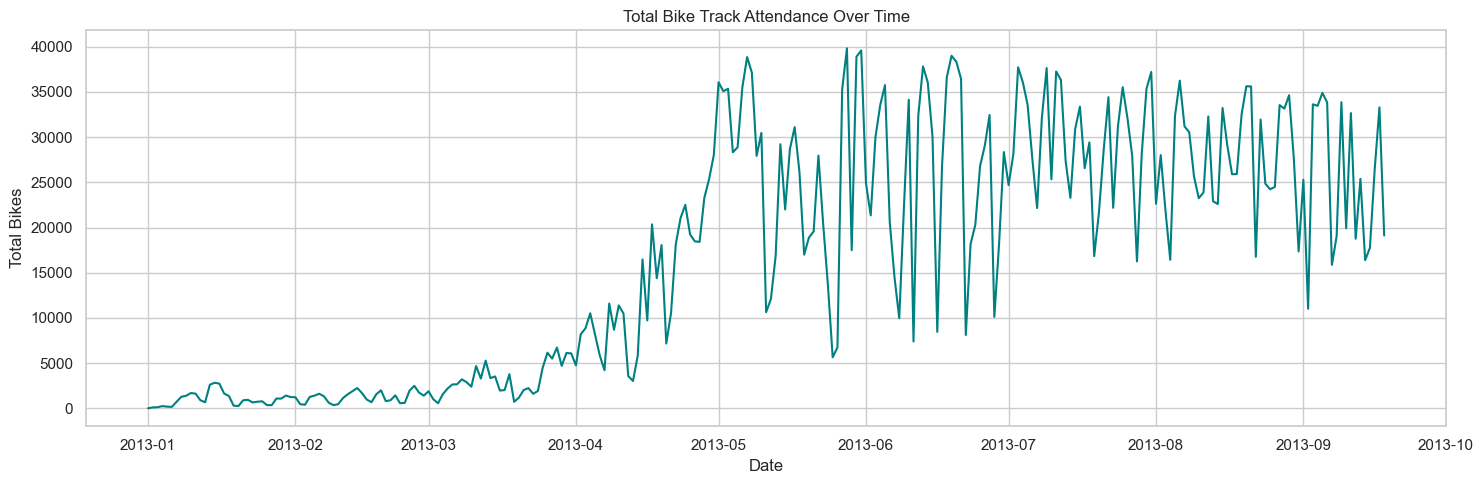

In [40]:
plt.figure(figsize=(15,5))
plt.plot(df['DateTime'], df['Total'], color='teal')
plt.title('Total Bike Track Attendance Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bikes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
monthly_avg = df.groupby('Month')[track_columns].mean()

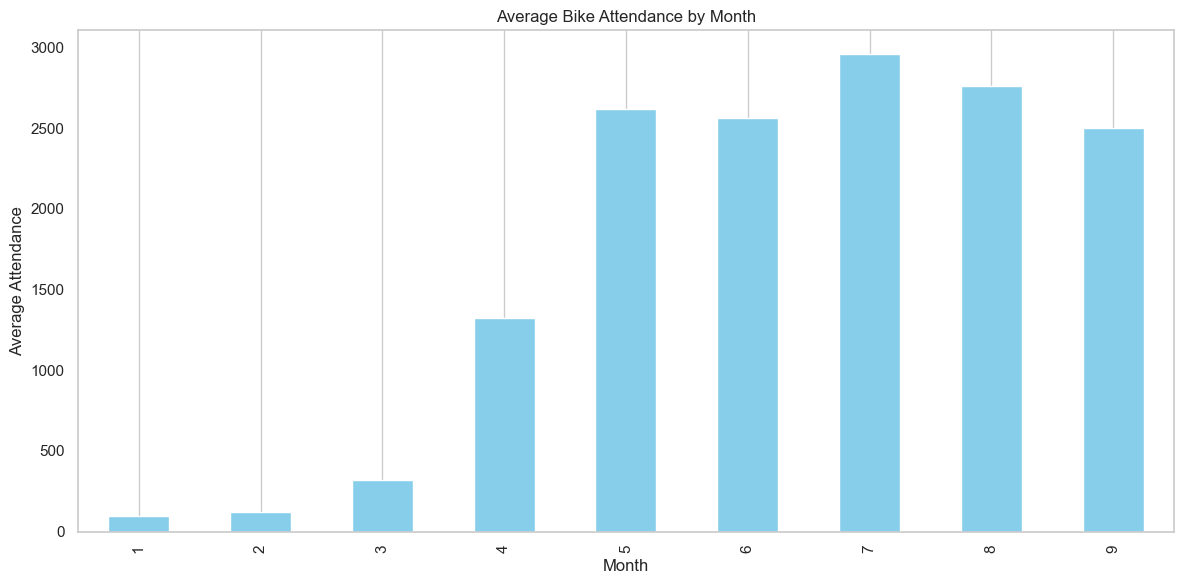

In [42]:
plt.figure(figsize=(12,6))
monthly_avg.mean(axis=1).plot(kind='bar', color='skyblue')
plt.title('Average Bike Attendance by Month')
plt.xlabel('Month')
plt.ylabel('Average Attendance')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [43]:
weekday_avg = df.groupby('Is_Weekend')[track_columns].mean()

<Figure size 800x500 with 0 Axes>

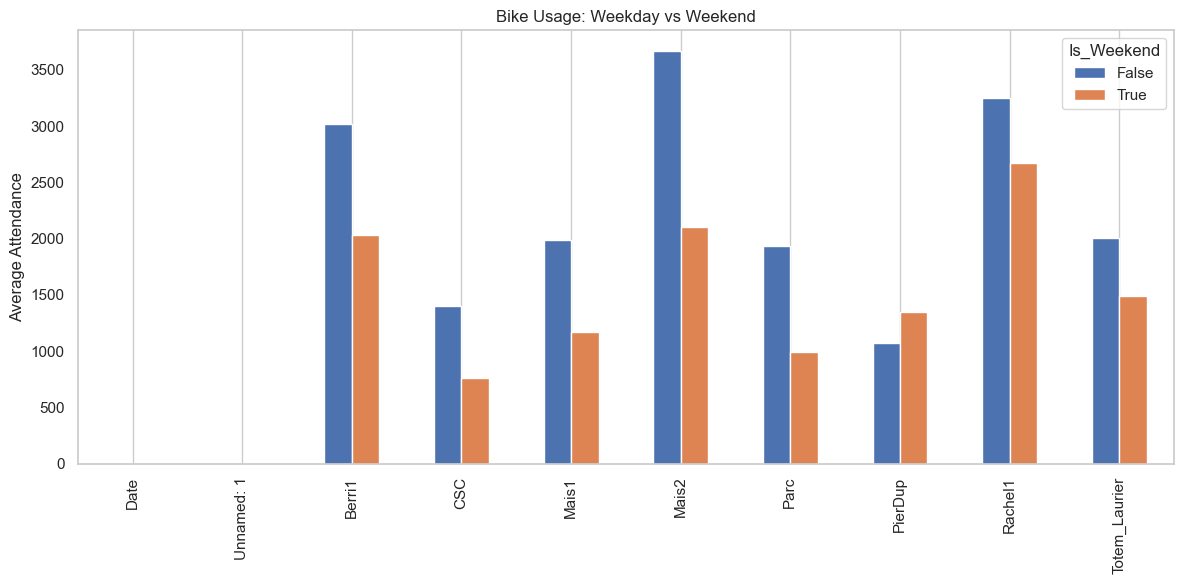

In [44]:
plt.figure(figsize=(8,5))
weekday_avg.T.plot(kind='bar', figsize=(12,6))
plt.title('Bike Usage: Weekday vs Weekend')
plt.ylabel('Average Attendance')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [45]:
dow_avg = df.groupby('Weekday')[track_columns].mean()
dow_avg = dow_avg.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

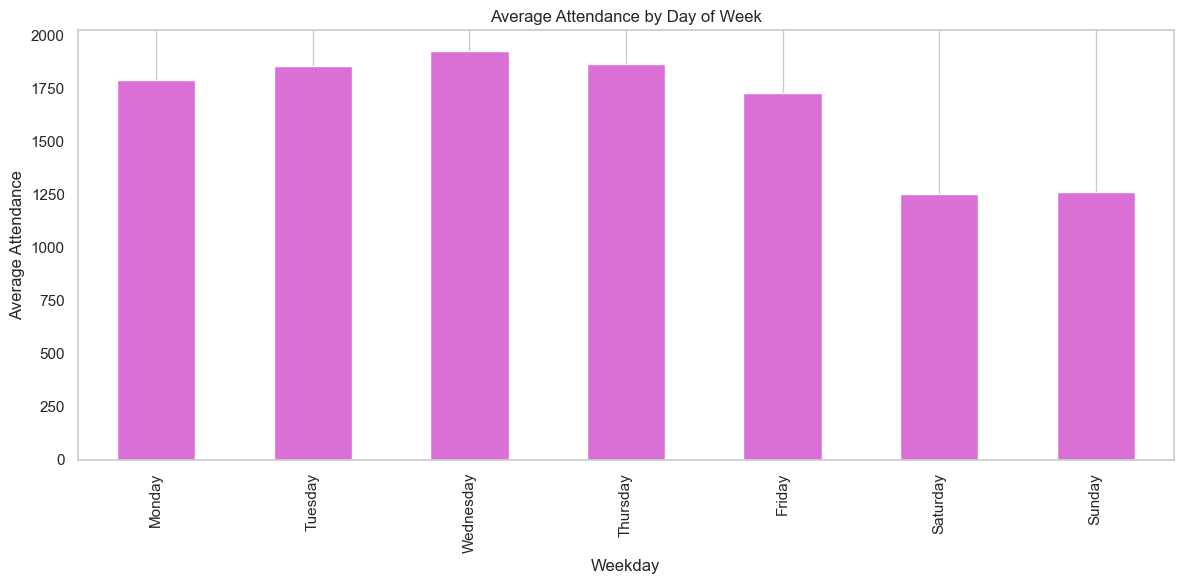

In [46]:
plt.figure(figsize=(12,6))
dow_avg.mean(axis=1).plot(kind='bar', color='orchid')
plt.title('Average Attendance by Day of Week')
plt.ylabel('Average Attendance')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [47]:
pivot = df.pivot_table(index=df['DateTime'].dt.month, columns=df['DateTime'].dt.year, values='Total', aggfunc='mean')

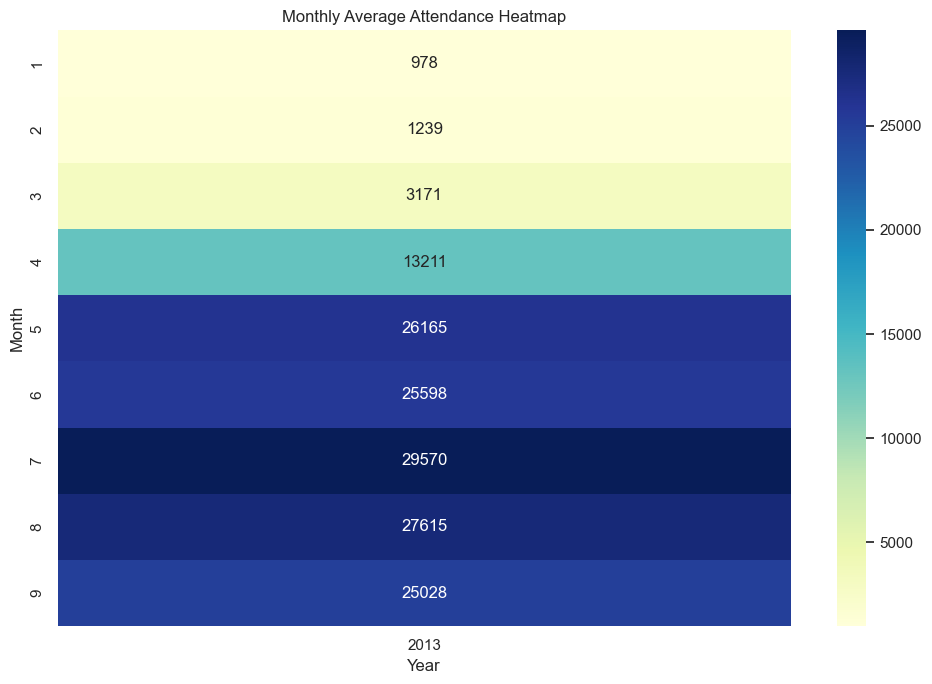

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Monthly Average Attendance Heatmap')
plt.ylabel('Month')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

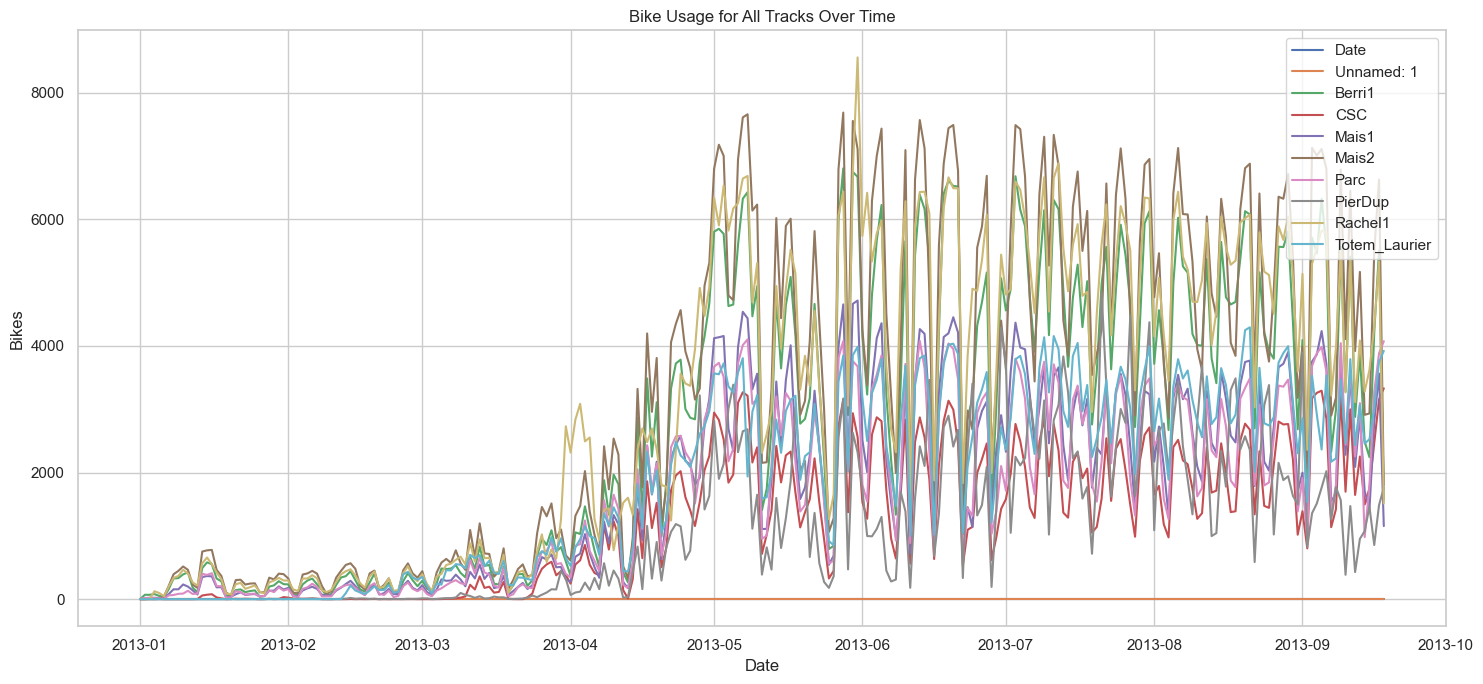

In [49]:
plt.figure(figsize=(15,7))
for col in track_columns:
    plt.plot(df['DateTime'], df[col], label=col)
plt.title('Bike Usage for All Tracks Over Time')
plt.xlabel('Date')
plt.ylabel('Bikes')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [50]:
threshold = df['Total'].mean() + 2 * df['Total'].std()
anomalies = df[df['Total'] > threshold]
print("Anomalies Detected:\n", anomalies[['DateTime', 'Total']])

Anomalies Detected:
 Empty DataFrame
Columns: [DateTime, Total]
Index: []
